In [27]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
# import find_file_names
from grouping_functions import *

In [28]:
directory_of_files = 'CSVs/stage_1/'
files_raw = [file for file in os.listdir(directory_of_files) if file.endswith('.csv') and file != 'streme_sites.csv']
files_raw


['meme_sites.csv',
 'bioprospector_sites.csv',
 'mdscan_sites.csv',
 'motifSampler_sites.csv']

In [29]:
dfs_list = []
for file in files_raw:
    df = pd.read_csv(os.path.join(directory_of_files, file), index_col=0)
    df = assign_score_group(df, 'Score', 5)
    vars()[file.split('.')[0]] = df
    dfs_list.append(vars()[file.split('.')[0]])


In [30]:
dfs_list = []
for file in files_raw:
    df = pd.read_csv(os.path.join(directory_of_files, file), index_col=0)
    df = assign_score_group(df, 'Score', 5)
    df['Algorithm'] = file.split('_')[0]  # Add new column with the part before the underscore
    vars()[file.split('.')[0]] = df
    dfs_list.append(vars()[file.split('.')[0]])


In [31]:
def assign_subgroup(df_list, file_name_col, seq_id_col, score_group_col):
    new_df_list = []

    for df in df_list:
        df['Subgroup'] = df[file_name_col].astype(str) + "_" + df[score_group_col].astype(str) + "_" + df['Sequence_ID'].astype(str)
        new_df_list.append(df)
    return new_df_list

In [32]:
id_df_list = assign_subgroup(dfs_list, 'File_name','Sequence_ID','Score_group')

In [33]:
id_df_list[0].head()

,Sequence_ID,Site,Starting_position,Score,Width,File_name,Score_group,Algorithm,Subgroup
0,1030995-1031010-reverse,AAGATAAGGG,377,2600000.0,10,FIS,5,meme,FIS_5_1030995-1031010-reverse
1,1297670-1297685-reverse,TTTATTAACT,253,2600000.0,10,FIS,5,meme,FIS_5_1297670-1297685-reverse
2,1297670-1297685-reverse,TTTATTAACT,253,2600000.0,10,FIS,5,meme,FIS_5_1297670-1297685-reverse
3,1297670-1297685-reverse,TTTATTAACT,253,2600000.0,10,FIS,5,meme,FIS_5_1297670-1297685-reverse
4,1297670-1297685-reverse,TTTATTAACT,253,2600000.0,10,FIS,5,meme,FIS_5_1297670-1297685-reverse


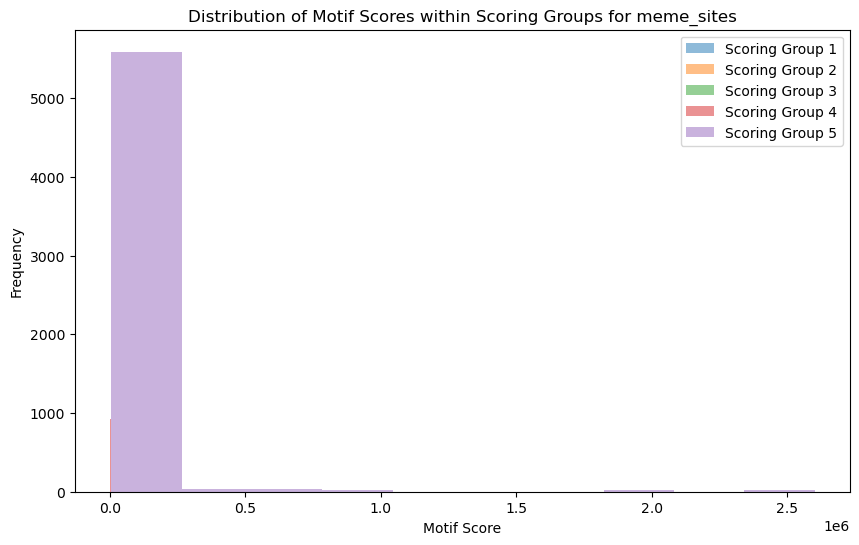

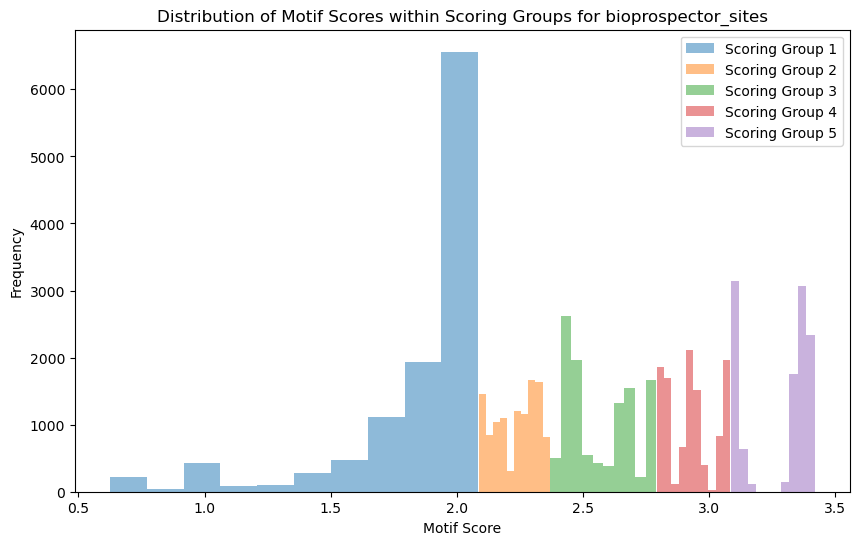

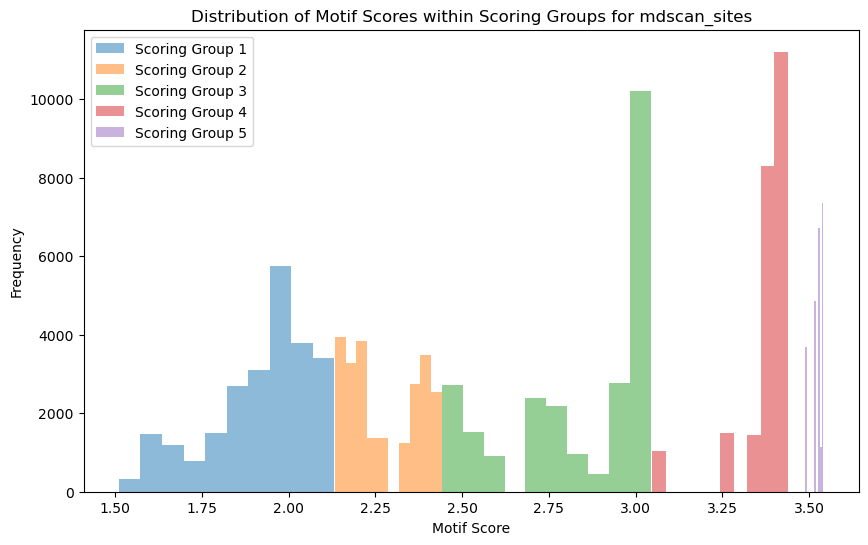

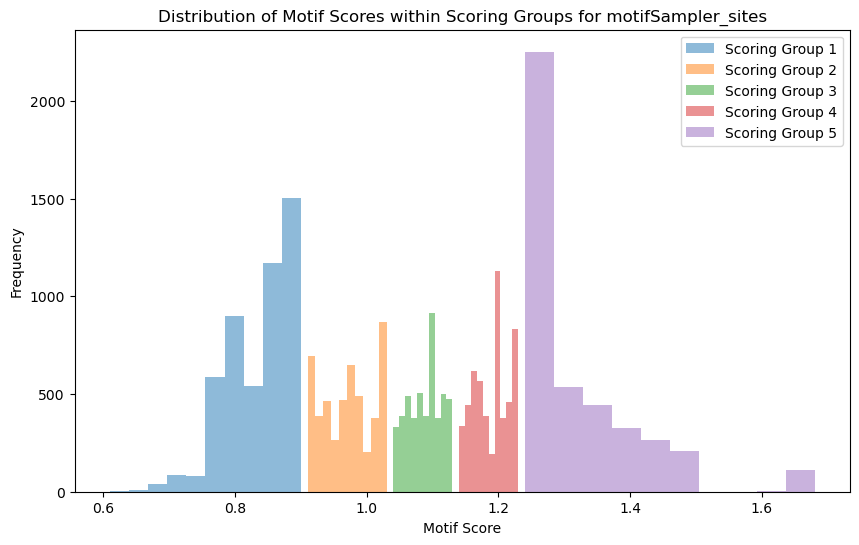

In [34]:
# Get file names without extension
file_names = [file.split('.')[0] for file in files_raw]

for df, file_name in zip(id_df_list, file_names):
    plt.figure(figsize=(10, 6))
    for group, group_df in df.groupby("Score_group"):
        plt.hist(group_df["Score"], bins=10, alpha=0.5, label=f"Scoring Group {group}")
    plt.xlabel("Motif Score")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Motif Scores within Scoring Groups for {file_name}")
    plt.legend()
    plt.show()


In [35]:
concatenated_df = pd.concat(id_df_list)
concatenated_df.shape

(227952, 9)

In [36]:
concatenated_df.head()

,Sequence_ID,Site,Starting_position,Score,Width,File_name,Score_group,Algorithm,Subgroup
0,1030995-1031010-reverse,AAGATAAGGG,377.0,2600000.0,10.0,FIS,5,meme,FIS_5_1030995-1031010-reverse
1,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
2,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
3,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse
4,1297670-1297685-reverse,TTTATTAACT,253.0,2600000.0,10.0,FIS,5,meme,FIS_5_1297670-1297685-reverse


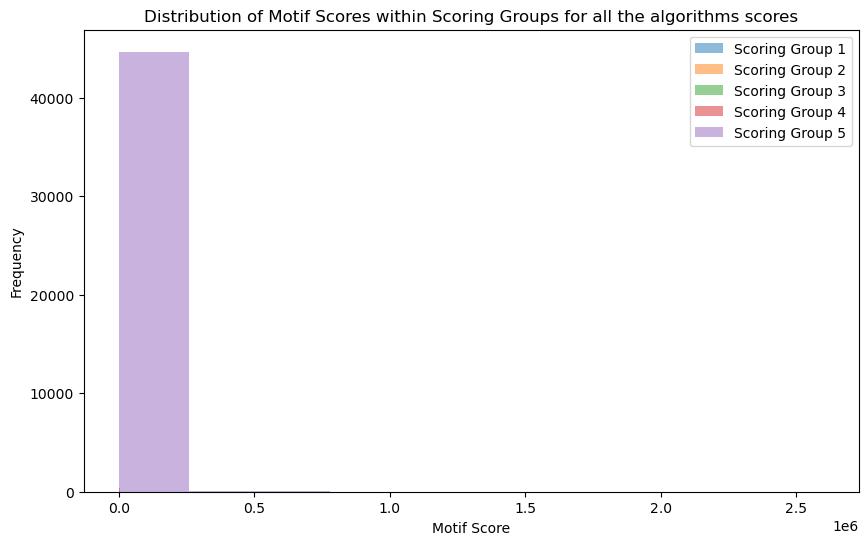

In [37]:
plt.figure(figsize=(10, 6))
for group, group_df in concatenated_df.groupby("Score_group"):
    plt.hist(group_df["Score"], bins=10, alpha=0.5, label=f"Scoring Group {group}")
plt.xlabel("Motif Score")
plt.ylabel("Frequency")
plt.title("Distribution of Motif Scores within Scoring Groups for all the algorithms scores")
plt.legend()
plt.show()


In [39]:
concatenated_df.to_csv('CSVs/grouping/Concatenated.csv', index=False)